# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize
import seaborn as sns; sns.set()   # trying a new package called seaborn to generate plots

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's time
now = datetime.datetime.now()
todayDate = now.strftime("%m/%d/%Y")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base URL for open weather API
baseURL = "http://api.openweathermap.org/data/2.5/weather?"

# df is the base dataframe with api responses
# I use a json_normalize() function to flatten and normalize json responses into dataframe
df = pd.DataFrame()
x = 1
print('Beginning Data Retrieval')
print('-' * 38)
for city in cities:
    queryUrl = baseURL + 'appid=' + api_key + '&q=' + city + '&units=imperial'
    try:
        response = requests.get(queryUrl).json()
        if response['cod'] == 200:
            print(f"Processing Record data for {x} of Set 1 | {city}")
            df = df.append(json_normalize(response), sort=True)
            x = x+1
        else:
            x = x-1
            pass
    except Exception as e:
        x = x-1
        pass
        


Beginning Data Retrieval
--------------------------------------
Processing Record data for 1 of Set 1 | avarua
Processing Record data for 2 of Set 1 | ilulissat
Processing Record data for 2 of Set 1 | tuktoyaktuk
Processing Record data for 3 of Set 1 | constitucion
Processing Record data for 4 of Set 1 | namatanai
Processing Record data for 5 of Set 1 | tiksi
Processing Record data for 6 of Set 1 | qaanaaq
Processing Record data for 7 of Set 1 | mataura
Processing Record data for 8 of Set 1 | mehamn
Processing Record data for 9 of Set 1 | nador
Processing Record data for 10 of Set 1 | rio grande
Processing Record data for 9 of Set 1 | dzaoudzi
Processing Record data for 10 of Set 1 | victoria
Processing Record data for 11 of Set 1 | bathsheba
Processing Record data for 12 of Set 1 | tessalit
Processing Record data for 13 of Set 1 | panama city
Processing Record data for 14 of Set 1 | upernavik
Processing Record data for 15 of Set 1 | carnarvon
Processing Record data for 16 of Set 1 | n

Processing Record data for 141 of Set 1 | padang
Processing Record data for 142 of Set 1 | fortuna
Processing Record data for 143 of Set 1 | gresham
Processing Record data for 144 of Set 1 | deputatskiy
Processing Record data for 145 of Set 1 | yerbogachen
Processing Record data for 145 of Set 1 | codrington
Processing Record data for 146 of Set 1 | mayskiy
Processing Record data for 147 of Set 1 | khatanga
Processing Record data for 148 of Set 1 | bull savanna
Processing Record data for 147 of Set 1 | tabou
Processing Record data for 148 of Set 1 | simao
Processing Record data for 149 of Set 1 | grindavik
Processing Record data for 150 of Set 1 | lebu
Processing Record data for 151 of Set 1 | gorebridge
Processing Record data for 152 of Set 1 | shumskiy
Processing Record data for 153 of Set 1 | honiara
Processing Record data for 154 of Set 1 | coihaique
Processing Record data for 155 of Set 1 | bontang
Processing Record data for 156 of Set 1 | mahebourg
Processing Record data for 157 

Processing Record data for 284 of Set 1 | ulaangom
Processing Record data for 285 of Set 1 | harper
Processing Record data for 286 of Set 1 | pahrump
Processing Record data for 287 of Set 1 | ahipara
Processing Record data for 288 of Set 1 | hoquiam
Processing Record data for 289 of Set 1 | qandala
Processing Record data for 290 of Set 1 | saint-leu
Processing Record data for 291 of Set 1 | zmeinogorsk
Processing Record data for 292 of Set 1 | xinglongshan
Processing Record data for 293 of Set 1 | yangjiang
Processing Record data for 293 of Set 1 | kazlu ruda
Processing Record data for 294 of Set 1 | tuatapere
Processing Record data for 295 of Set 1 | aberdeen
Processing Record data for 296 of Set 1 | batticaloa
Processing Record data for 297 of Set 1 | marienburg
Processing Record data for 298 of Set 1 | margate
Processing Record data for 298 of Set 1 | kidal
Processing Record data for 299 of Set 1 | richards bay
Processing Record data for 300 of Set 1 | aloleng
Processing Record data

Processing Record data for 424 of Set 1 | herat
Processing Record data for 425 of Set 1 | nemuro
Processing Record data for 426 of Set 1 | ouadda
Processing Record data for 427 of Set 1 | sakata
Processing Record data for 428 of Set 1 | sept-iles
Processing Record data for 429 of Set 1 | namibe
Processing Record data for 430 of Set 1 | hwange
Processing Record data for 431 of Set 1 | aspindza
Processing Record data for 432 of Set 1 | staryy nadym
Processing Record data for 433 of Set 1 | le port
Processing Record data for 434 of Set 1 | rorvik
Processing Record data for 434 of Set 1 | krasnokholmskiy
Processing Record data for 435 of Set 1 | ballarat
Processing Record data for 435 of Set 1 | kieta
Processing Record data for 436 of Set 1 | pevek
Processing Record data for 437 of Set 1 | kishi
Processing Record data for 438 of Set 1 | xining
Processing Record data for 439 of Set 1 | nkhotakota
Processing Record data for 440 of Set 1 | wilmington
Processing Record data for 441 of Set 1 | 

In [4]:
## check api response data, occasionally, you get humidity reading above 100%
## these are bad data that may skew the plot, so they need to be dropped
df.loc[df['main.humidity'] > 100]

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed
0,stations,0,200,-4.58,-81.27,1551733200,3691582,NaN,290,1009.0,...,8685.0,0.0045,1551699079,1551742907,1.0,10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...",270.0,NaN,8.05


In [5]:
# show all the column heads of the raw dataframe
list(df)

['base',
 'clouds.all',
 'cod',
 'coord.lat',
 'coord.lon',
 'dt',
 'id',
 'main.grnd_level',
 'main.humidity',
 'main.pressure',
 'main.sea_level',
 'main.temp',
 'main.temp_max',
 'main.temp_min',
 'name',
 'rain.1h',
 'rain.3h',
 'snow.1h',
 'snow.3h',
 'sys.country',
 'sys.id',
 'sys.message',
 'sys.sunrise',
 'sys.sunset',
 'sys.type',
 'visibility',
 'weather',
 'wind.deg',
 'wind.gust',
 'wind.speed']

In [6]:
# take a look at the columns and raw dataset - there are some odd columns and missing values
df.count()

base               572
clouds.all         572
cod                572
coord.lat          572
coord.lon          572
dt                 572
id                 572
main.grnd_level    279
main.humidity      572
main.pressure      572
main.sea_level     279
main.temp          572
main.temp_max      572
main.temp_min      572
name               572
rain.1h             26
rain.3h             48
snow.1h              7
snow.3h              6
sys.country        572
sys.id             293
sys.message        572
sys.sunrise        572
sys.sunset         572
sys.type           293
visibility         262
weather            572
wind.deg           561
wind.gust           49
wind.speed         572
dtype: int64

In [7]:
# drop humidity > 100% rows, check data integrity
df = df.rename(columns={'main.humidity' : 'humidity'})
df = df[df.humidity <= 100]
df.count()

base               571
clouds.all         571
cod                571
coord.lat          571
coord.lon          571
dt                 571
id                 571
main.grnd_level    279
humidity           571
main.pressure      571
main.sea_level     279
main.temp          571
main.temp_max      571
main.temp_min      571
name               571
rain.1h             26
rain.3h             48
snow.1h              7
snow.3h              6
sys.country        571
sys.id             292
sys.message        571
sys.sunrise        571
sys.sunset         571
sys.type           292
visibility         261
weather            571
wind.deg           560
wind.gust           49
wind.speed         571
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# df1 is modified dataframe with relevent data for final reports
df1 = pd.DataFrame()

df1['City'] = df['name']
df1['Cloudiness'] = df['clouds.all']
df1['Country'] = df['sys.country']
df1['Humidity'] = df['humidity']
df1['Date'] = df['dt']
df1['Latitude'] = df['coord.lat']
df1['Longitude'] = df['coord.lon']
df1['Max Temp'] = df['main.temp_max']
df1['Wind Speed'] = df['wind.speed']

# export results to output csv file
df1.to_csv(output_data_file)

# display dataframe
df1.head()

,City,Cloudiness,Country,Humidity,Date,Latitude,Longitude,Max Temp,Wind Speed
0,Avarua,100,CK,65,1551733200,-21.21,-159.78,80.60,9.17
0,Ilulissat,75,GL,78,1551732600,69.22,-51.10,12.20,6.93
0,Tuktoyaktuk,5,CA,85,1551733200,69.44,-133.03,10.40,8.05
0,Constitucion,5,MX,5,1551734417,23.99,-104.67,86.00,21.92
0,Namatanai,88,PG,100,1551734588,-3.66,152.44,82.52,8.97


In [9]:
# check data integrity - should have same number each columns
df1.count()

City          571
Cloudiness    571
Country       571
Humidity      571
Date          571
Latitude      571
Longitude     571
Max Temp      571
Wind Speed    571
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

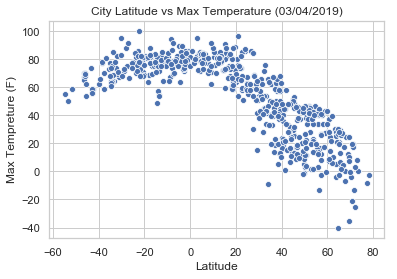

In [10]:
# plotting Lat vs Temp using 
x = df1['Latitude']
y = df1['Max Temp']
tempPlot = sns.set_style("whitegrid")
tempPlot = sns.scatterplot(x, y, data=df1)
tempPlot.set(xlabel='Latitude', ylabel='Max Tempreture (F)')
plt.title(f'City Latitude vs Max Temperature ({todayDate})')
plt.show()

#### Latitude vs. Humidity Plot

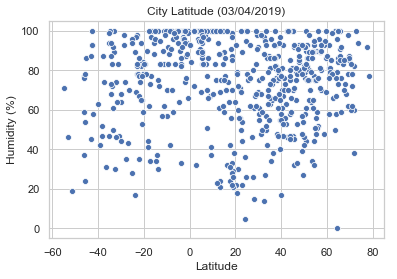

In [11]:
x = df1['Latitude']
y = df1['Humidity']
tempPlot = sns.set_style("whitegrid")

plt.title(f'City Latitude ({todayDate})')
tempPlot = sns.scatterplot(x, y, data=df1,)
tempPlot.set(xlabel='Latitude', ylabel='Humidity (%)')
plt.show()

#### Latitude vs. Cloudiness Plot

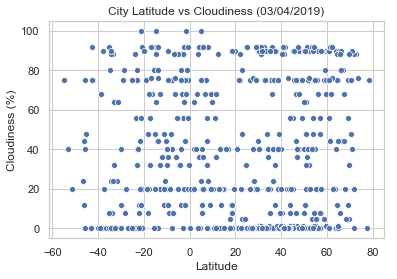

In [12]:
x = df1['Latitude']
y = df1['Cloudiness']
tempPlot = sns.set_style("whitegrid")
tempPlot = sns.scatterplot(x, y, data=df1)
tempPlot.set(xlabel='Latitude', ylabel='Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({todayDate})')
plt.show()

#### Latitude vs. Wind Speed Plot

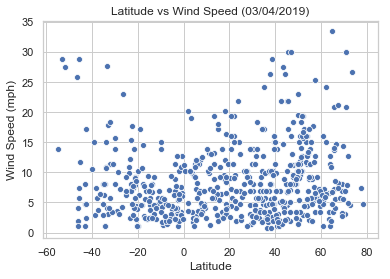

In [13]:
x = df1['Latitude']
y = df1['Wind Speed']
tempPlot = sns.set_style("whitegrid")
tempPlot = sns.scatterplot(x, y, data=df1)
tempPlot.set(xlabel='Latitude', ylabel='Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed ({todayDate})')
plt.show()